<a href="https://colab.research.google.com/github/Maxibrionest/FMY-Fundamentos-Machine-Learning/blob/main/Entrega3/Entrega3_FMY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FMY-001V**

# Entrega 1

## Parte 1 - Exploración de datos


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV


In [2]:
url = 'https://raw.githubusercontent.com/Maxibrionest/FMY-Fundamentos-Machine-Learning/main/Entrega1/boston_housing.csv'
df = pd.read_csv(url, sep=",")

In [3]:
df.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df.sample(7)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
310,2.63548,0.0,9.90,0,0.544,4.973,37.8,2.5194,4,304.0,18.4,350.45,12.64,16.1
462,6.65492,0.0,18.10,0,0.713,6.317,83.0,2.7344,24,666.0,20.2,396.90,13.99,19.5
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666.0,20.2,109.85,23.27,13.4
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276.0,16.4,393.74,10.50,23.0
480,5.82401,0.0,18.10,0,0.532,6.242,64.7,3.4242,24,666.0,20.2,396.90,10.74,23.0
53,0.04981,21.0,5.64,0,0.439,5.998,21.4,6.8147,4,243.0,16.8,396.90,8.43,23.4
308,0.49298,0.0,9.90,0,0.544,6.635,82.5,3.3175,4,304.0,18.4,396.90,4.54,22.8


In [5]:
#Se describen las columnas con su tipo de dato y señalando que no son nulos. Ademas se puede señalar que son 506 registros.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


En base a la siguiente información del comando info, podemos deducir que no hay "Missing Values"

In [6]:
#El siguiente metodo devuelve una serie que contiene recuentos de filas unicas en el Data frame.
df.value_counts()

crim      zn    indus  chas  nox    rm     age    dis      rad  tax    ptratio  black   lstat  medv
88.97620  0.0   18.10  0     0.671  6.968  91.9   1.4165   24   666.0  20.2     396.90  17.21  10.4    1
0.12083   0.0   2.89   0     0.445  8.069  76.0   3.4952   2    276.0  18.0     396.90  4.21   38.7    1
0.10612   30.0  4.93   0     0.428  6.095  65.1   6.3361   6    300.0  16.6     394.62  12.40  20.1    1
0.10659   80.0  1.91   0     0.413  5.936  19.5   10.5857  4    334.0  22.0     376.04  5.57   20.6    1
0.10793   0.0   8.56   0     0.520  6.195  54.4   2.7778   5    384.0  20.9     393.49  13.00  21.7    1
                                                                                                      ..
1.25179   0.0   8.14   0     0.538  5.570  98.1   3.7979   4    307.0  21.0     376.57  21.02  13.6    1
1.27346   0.0   19.58  1     0.605  6.250  92.6   1.7984   5    403.0  14.7     338.92  5.50   27.0    1
1.34284   0.0   19.58  0     0.605  6.066  100.0  1.7573   5

In [7]:
df["crim"].describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: crim, dtype: float64

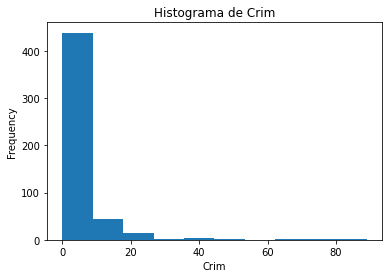

In [8]:
df["crim"].plot.hist()
plt.xlabel("Crim")
plt.title("Histograma de Crim")
plt.show()

La característica "crim" corresponde al porcentaje de criminalidad per cápita por ciudad. 

Su valor mínimo es 0.006320

Su valor máximo es 88.976200

Su promedio es 3.613524

Su desviación estandar es 8.601545

Entre 0 y 50 se encuentra la mayor cantidad de valores.



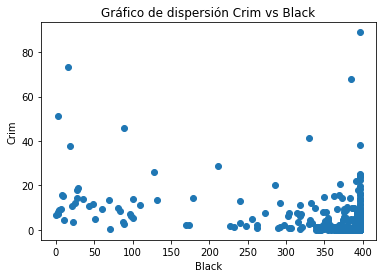

In [9]:
plt.scatter(df["black"], df["crim"])
plt.xlabel("Black")
plt.ylabel('Crim')
plt.title("Gráfico de dispersión Crim vs Black")
plt.show()

In [10]:
df["zn"].describe()

count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: zn, dtype: float64

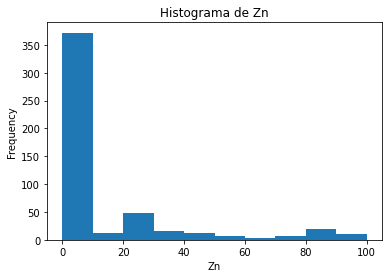

In [11]:
df["zn"].plot.hist()
plt.xlabel("Zn")
plt.title("Histograma de Zn")
plt.show()

La característica "zn" corresponde a la proporción de zonas residenciales para lotes sobre los 25,000 sq.ft.

Su valor mínimo es 0.000000

Su valor máximo es 100.000000

Su promedio es 11.363636

Su desviación estandar es 23.322453

Según el histograma podemos deducir que entre 0 y 10 se encuentra la moda, la cual presenta una alta frecuencia, con una diferencia muy marcada en relación a los otros rangos. El resto de valores se divide relativamente uniforme. 


In [12]:
df["indus"].describe()

count    506.000000
mean      11.136779
std        6.860353
min        0.460000
25%        5.190000
50%        9.690000
75%       18.100000
max       27.740000
Name: indus, dtype: float64

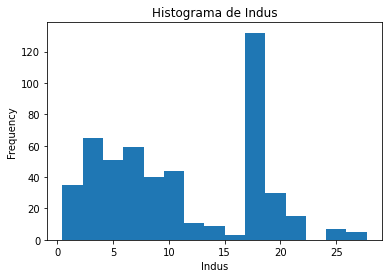

In [13]:
df["indus"].plot.hist(bins=15)
plt.xlabel("Indus")
plt.title("Histograma de Indus")
plt.show()

La característica "indus" corresponde a la proporción de acres de negocios que no sean de retail por ciudad.

Su valor mínimo es 0.460000

Su valor máximo es 27.740000

Su promedio es 11.136779

Desviación estandar 6.860353

Entre el rango de 0 a 14 podemos ver una relativa uniformidad.

Por otro lado cercano al valor 17 hay un notable crecimiento en la frecuencia. 








In [14]:
df["chas"].describe()

count    506.000000
mean       0.069170
std        0.253994
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: chas, dtype: float64

La característica "chas" equivale a la variable auxiliar sobre, si se encuentra cercano el rio.

Su valor mínimo es 0.000000

Su valor máximo es 1.000000

Su promedio es 0.069170

Desviación estandar 0.253994

Esta característica solo varía entre 0 y 1 sin poder tomar otros valores.
El 1 equivale a Si y el 0 a No.  

In [15]:
df.groupby("chas").size()

chas
0    471
1     35
dtype: int64

[]

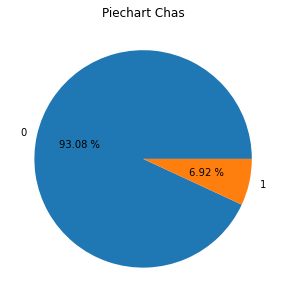

In [16]:
df.groupby("chas").size().plot.pie(title="Piechart Chas", label='', autopct="%0.2f %%", figsize=(5,5))
plt.plot()

Según el gráfico de torta, el 6,92 % de las casas colindan con el río y el 93,08 % No colindan con el río. 

In [17]:
df["nox"].describe()

count    506.000000
mean       0.554695
std        0.115878
min        0.385000
25%        0.449000
50%        0.538000
75%        0.624000
max        0.871000
Name: nox, dtype: float64

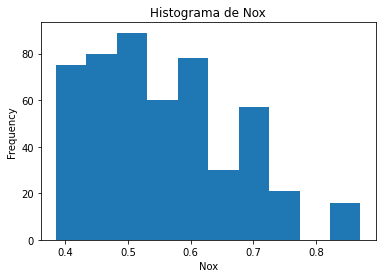

In [18]:
df["nox"].plot.hist()
plt.xlabel("Nox")
plt.title("Histograma de Nox")
plt.show()

La característica "nox" corresponde a los óxidos de nitrógeno medidos en partes por 10 millones. 

Su valor mínimo es 0.385000

Su valor máximo es 0.871000

Su promedio es 0.554695

Desviación estandar 0.115878

Según el histograma anterior podemos decir que la frecuencia es similar a la campana de gauss en descenso.

In [19]:
df["rm"].mode()

0    5.713
1    6.127
2    6.167
3    6.229
4    6.405
5    6.417
dtype: float64

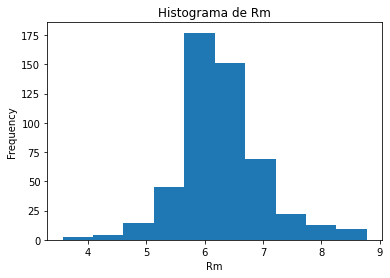

In [20]:
df["rm"].plot.hist()
plt.xlabel("Rm")
plt.title("Histograma de Rm")
plt.show()

La característica "rm" corresponde a el número promedio de habitaciones por vivienda.

Su valor mínimo es 3.561000

Su valor máximo es 8.780000

Su promedio es 6.284634

Desviación estandar 0.702617

En el histograma se puede notar que el promedio es similar a la mediana. 

Ádemas podemos observar que existen 6 modas que se encuentran en el intervalo de 5.713 y 6.417. 

Por otra parte podemos deducir que la mayor frecuencia se encuentra en el rango de 5,6486 y 6,1705.


In [21]:
df["age"].describe()

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: age, dtype: float64

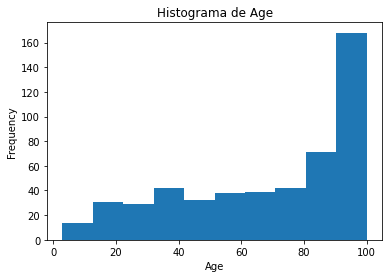

In [22]:
df["age"].plot.hist()
plt.xlabel("Age")
plt.title("Histograma de Age")
plt.show()

La característica "age" corresponde a unidades construidas ocupadas por sus dueños antes de 1940.

Su valor mínimo es 2.900000

Su valor máximo es 100.000000

Su promedio es 68.574901

Desviación estandar 28.148861

Según el histograma tenemos muchas ciudades de Boston que a la fecha de 1940 todas las casas estaban habitadas por sus dueños. 

Por otro lado la mayor frecuencia corresponde al rango del 90% a 100%, siendo esta cercano a 170. 

In [23]:
df["dis"].describe()

count    506.000000
mean       3.795043
std        2.105710
min        1.129600
25%        2.100175
50%        3.207450
75%        5.188425
max       12.126500
Name: dis, dtype: float64

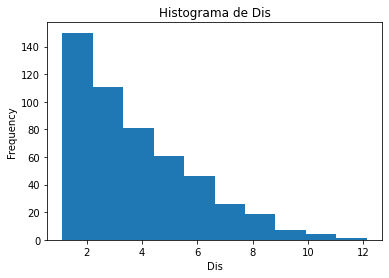

In [24]:
df["dis"].plot.hist()
plt.xlabel("Dis")
plt.title("Histograma de Dis")
plt.show()

La característica "dis" es el promedio ponderado de la distancia hacia 5 centros de empleo de Boston.

Su valor mínimo es 1.129600

Su valor máximo es 12.126500

Su promedio es 3.795043

Desviación estandar 2.105710

En el histrograma podemos notar una distribución binomial truncada. 


In [25]:
df["rad"].describe()

count    506.000000
mean       9.549407
std        8.707259
min        1.000000
25%        4.000000
50%        5.000000
75%       24.000000
max       24.000000
Name: rad, dtype: float64

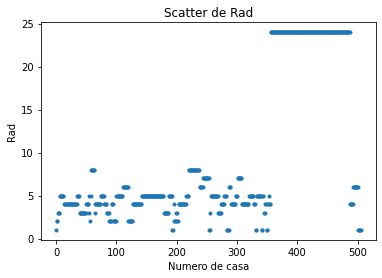

In [26]:
df["rad"].plot(ls="", marker=".")
plt.xlabel("Numero de casa")
plt.ylabel("Rad")
plt.title("Scatter de Rad")
plt.show()

In [27]:
df.groupby("rad").size()

rad
1      20
2      24
3      38
4     110
5     115
6      26
7      17
8      24
24    132
dtype: int64

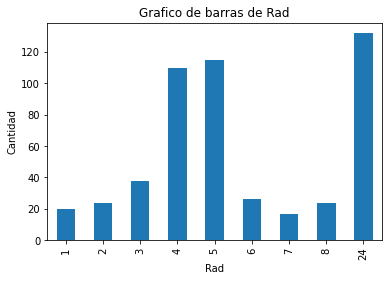

In [28]:
df.groupby("rad").size().plot.bar()
plt.xlabel("Rad")
plt.title("Grafico de barras de Rad")
plt.ylabel("Cantidad")
plt.show()

La característica "rad" corresponde al indice de accesibilidad a carreteras principales 

Su valor mínimo es 1.000000

Su valor máximo es 24.000000

Su promedio es 9.549407

Desviación estandar 8.707259

En el gráfico asociado a "rad" se puede notar 9 valores distintos y los mas frecuentes equivalen a 4, 5 y 24

In [29]:
df["tax"].describe()

count    506.000000
mean     408.237154
std      168.537116
min      187.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: tax, dtype: float64

In [30]:
df.groupby("tax").size()

tax
187.0      1
188.0      7
193.0      8
198.0      1
216.0      5
        ... 
432.0      9
437.0     15
469.0      1
666.0    132
711.0      5
Length: 66, dtype: int64

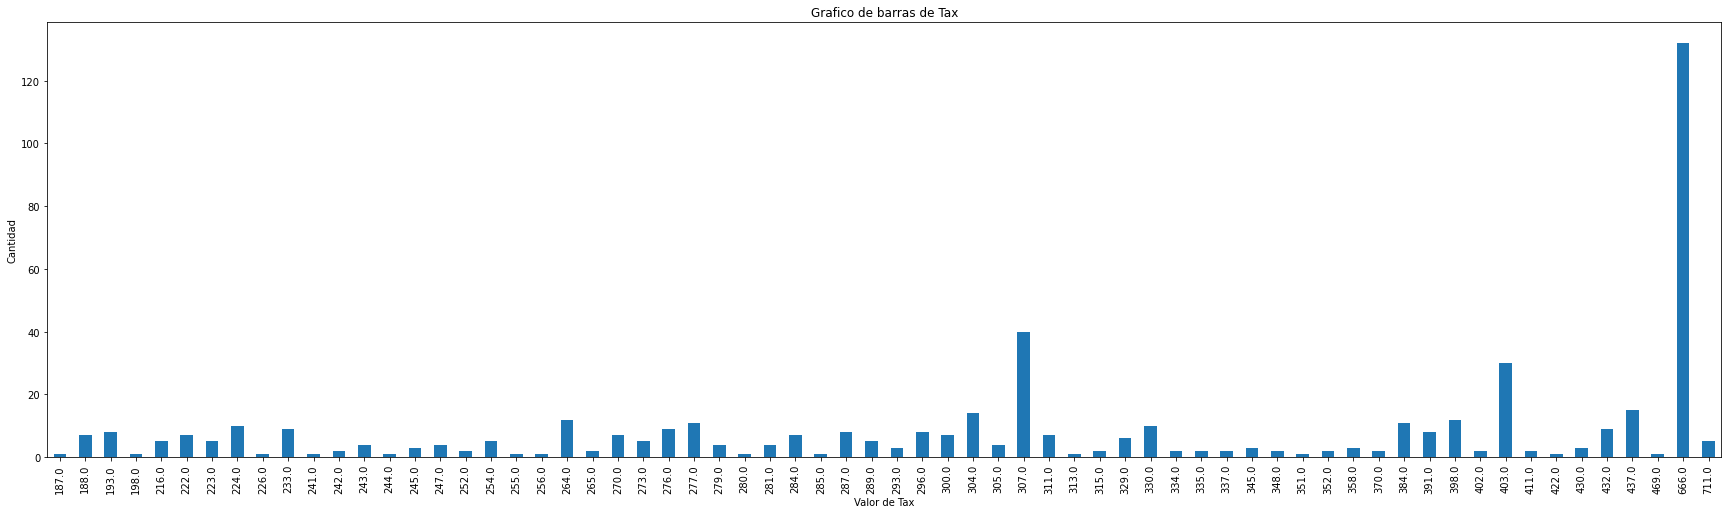

In [31]:
df.groupby("tax").size().plot.bar(figsize=(30,8))
plt.xlabel("Valor de Tax")
plt.ylabel('Cantidad')
plt.title("Grafico de barras de Tax")
plt.show()

La característica "tax" es la proporción de impuesto por propiedad como valor total cada $10,000.

Su valor mínimo es 187.000000

Su valor máximo es 711.000000

Su promedio es 408.237154

Desviación estandar 168.537116

Según el histograma tenemos 66 valores discretos posibles. El valor que más se repite es 666.0, 132 veces.


In [32]:
df["ptratio"].describe()

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: ptratio, dtype: float64

In [33]:
df.groupby("ptratio").size().count()

46

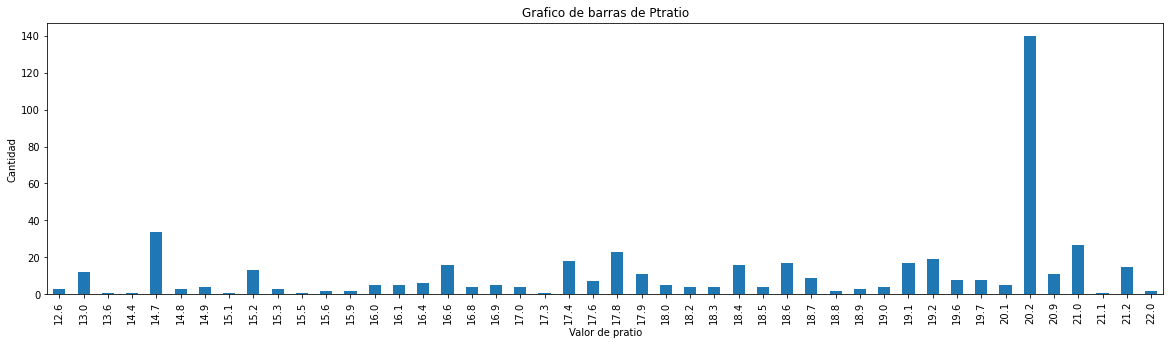

In [34]:
df.groupby("ptratio").size().plot.bar(figsize=(20,5))
plt.xlabel("Valor de pratio")
plt.ylabel("Cantidad")
plt.title("Grafico de barras de Ptratio")
plt.show()

La característica "ptratio" es la proporción estudiante promedio por ciudad. 

Su valor mínimo es 12.600000

Su valor máximo es 22.000000

Su promedio es 18.455534

Desviación estandar 2.164946

En base al gráfico de barra se puede concluir que existen 46 valores posibles y el más común es 20,2


In [35]:
df["black"].describe()

count    506.000000
mean     356.674032
std       91.294864
min        0.320000
25%      375.377500
50%      391.440000
75%      396.225000
max      396.900000
Name: black, dtype: float64

In [36]:
df.groupby("black").size().count()

357

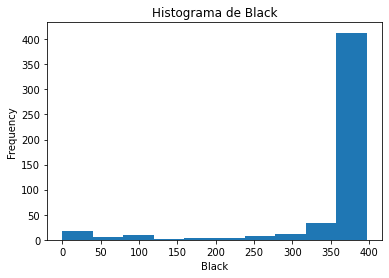

In [37]:
df["black"].plot.hist()
plt.xlabel("Black")
plt.title("Histograma de Black")
plt.show()

La característica "black" es 1000(Bk - 0.63)^2 donde Bk es la proporción de personas de color por ciudad. 

Su valor mínimo es 0.320000

Su valor máximo es 396.900000

Su promedio es 356.674032

Desviación estandar 91.294864

En el histograma las mayores frecuencias estan sobre los 350.



In [38]:
df["lstat"].describe()

count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: lstat, dtype: float64

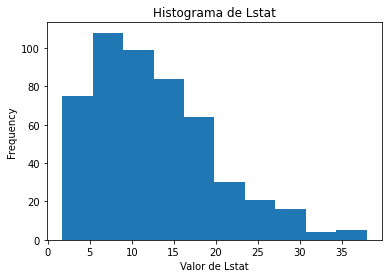

In [39]:
df["lstat"].plot.hist()
plt.xlabel("Valor de Lstat")
plt.title("Histograma de Lstat")
plt.show()

La característica "lstat" equivale al estatus más bajo de la población medido en porcentaje. Se refiere a la cantidad de población sin estudios secundarios completados, junto a los obreros.  

Su valor mínimo es 1.730000

Su valor máximo es 37.970000

Su promedio es 12.653063

Desviación estandar 7.141062

En el histograma se observa que el grueso de las ciudades tiene un 20% o menos de la población que no ha terminado los estudios secundarios.  



In [40]:
df["medv"].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

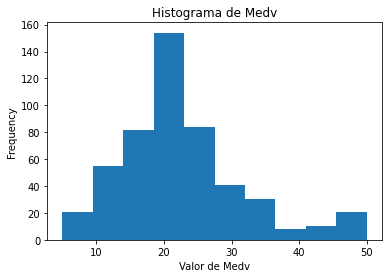

In [41]:
df["medv"].plot.hist()
plt.xlabel("Valor de Medv")
plt.title("Histograma de Medv")
plt.show()

La característica "medv" es el valor de la mediana de las casas ocupadas por sus dueños, medidas en $1000s. 

Su valor mínimo es 5.000000

Su valor máximo es 50.000000

Su promedio es 22.532806

Desviación estandar 9.197104

En el histograma notamos una distribución similar a una normal. 

## Parte 2 - Preparación de datos


### Análisis y preparación


#### Exploración - definición de funciones útiles

#### Crim

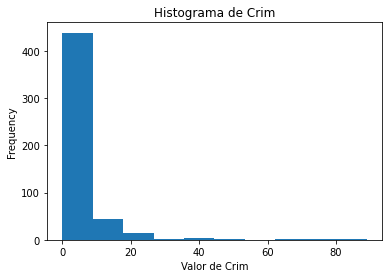

In [42]:
df["crim"].plot.hist()
plt.xlabel("Valor de Crim")
plt.title("Histograma de Crim")
plt.show()

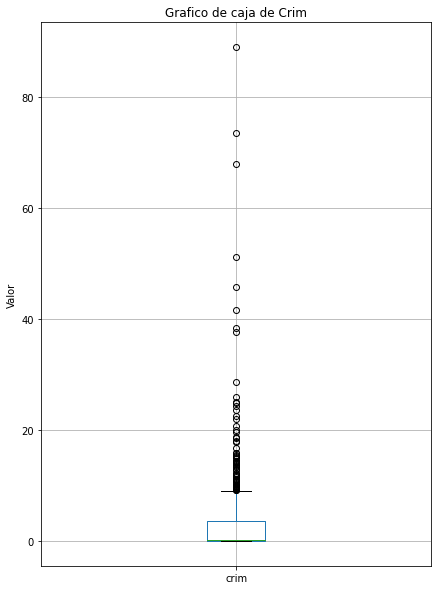

In [43]:
df.boxplot(column=["crim"],figsize=(7,10))
plt.ylabel('Valor')
plt.title("Grafico de caja de Crim")
plt.show()

En los diagramas de caja o _boxplot_ la caja central corresponde a a las demarcaciones de $Q_{1}$ y $Q_{3}$, la línea intermedia, poco visible en este caso, a la mediana, es decir $Q_{2}$, los "bigotes" a los límites no anómalos que van desde los valores máximo y mínimo o 1.5 IQR. Los círculos representan datos atípicos, fuera de los límites ya señalados.

Es visible la importante cantidad de datos fuera de los límites no atípicos (rango intercuartílico $\pm 1.5$ $IQR$, es donde están el 50% de los datos centrales, equivalente a $Q_{3} - Q_{1}$).

Lo señalado anteriormente fue extraído de *https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm*, Instituto Nacional de Estándares y Tecnología de EE.UU.(NIST por sus siglas en inglés).

In [44]:
def clean_custom(df, col, iqrFences):
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    iqr = q3-q1 #IQR definido anteriormente
    fence_low  = q1 - iqrFences * iqr
    fence_high = q3 + iqrFences * iqr
    df_out = df.loc[(df[col] > fence_low) & (df[col] < fence_high)]
    size = df_out.shape[0]
    pctg = size/df.shape[0]   # calcula el porcentaje de observaciones consideradas respecto al df original
    return df_out, pctg

def clean_outliers_hard(df, col):
    # elimina outliers fuera del rango +- 1.5 IQR de los cuartiles
    # En el boxplot, elimina los datos atípicos
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    iqr = q3-q1 #IQR definido anteriormente
    fence_low  = q1 - 1.5*iqr
    fence_high = q3 + 1.5*iqr
    df_out = df.loc[(df[col] > fence_low) & (df[col] < fence_high)]
    return df_out

def clean_outliers_soft(df, col):
    # elimina outliers fuera del rango +- 3.0 IQR de los cuartiles
    # Dado que sus limites son mas amplios, elimina menos datos o equivalentemente considera mas datos
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    iqr = q3-q1 #IQR definido anteriormente
    fence_low  = q1 - 3*iqr
    fence_high = q3 + 3*iqr
    df_out = df.loc[(df[col] > fence_low) & (df[col] < fence_high)]
    return df_out


In [45]:
#print(df[df["crim"].between(df["crim"].quantile(0.25), df["crim"].quantile(0.75))].shape[0])

0.9011857707509882


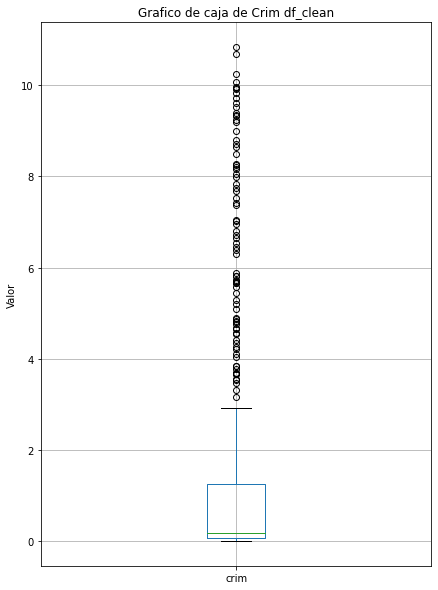

In [46]:
df_clean, df_clean_p = clean_custom(df, "crim", 2)
print(df_clean_p)

df_clean.boxplot(column=["crim"],figsize=(7,10))
plt.ylabel('Valor')
plt.title("Grafico de caja de Crim df_clean")
plt.show()

In [47]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [48]:
df_clean.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000
mean,1.500031,12.609649,10.373268,0.076754,0.541811,6.345478,65.808772,4.025789,7.964912,379.973684,18.264254,367.735175,11.533377,23.647368
std,2.624132,24.247964,6.806170,0.266494,0.113948,0.664645,28.130736,2.089903,7.660580,153.049986,2.197945,73.064204,6.213131,8.842040
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,6.300000
25%,0.070197,0.000000,4.930000,0.000000,0.447000,5.927750,41.100000,2.326450,4.000000,277.000000,16.800000,377.642500,6.612500,18.400000
50%,0.193625,0.000000,8.140000,0.000000,0.520000,6.229500,72.600000,3.513850,5.000000,307.000000,18.600000,392.015000,10.280000,21.900000
75%,1.257208,20.000000,18.100000,0.000000,0.605000,6.636750,91.800000,5.400800,7.000000,430.000000,20.200000,396.080000,15.375000,26.600000
max,10.834200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.410000,50.000000


In [49]:
df2 = clean_outliers_hard(df, "crim")
df3 = clean_outliers_soft(df, "crim")

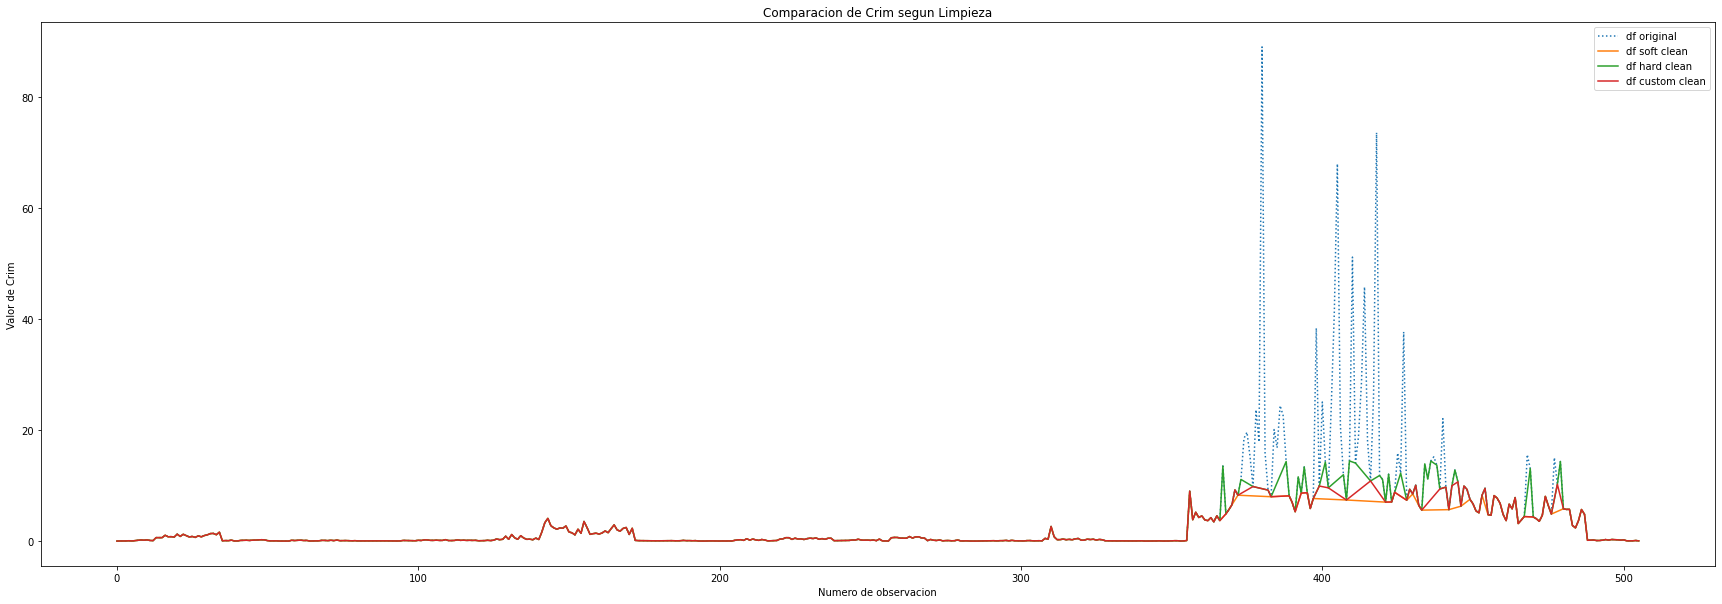

In [50]:
plt.figure(figsize=(30,10))
plt.plot(df["crim"], label="df original", ls=":", marker="")
plt.plot(df2["crim"], label="df soft clean")
plt.plot(df3["crim"], label="df hard clean")
plt.plot(df_clean["crim"], label="df custom clean")
plt.legend()
plt.xlabel("Numero de observacion")
plt.ylabel('Valor de Crim')
plt.title("Comparacion de Crim segun Limpieza")
plt.show()

De lo anterior, ya que df_clean contiene el 90.12% aproximadamente de los casos, se propone df_clean como dataset limpio respecto a la característica ***crim***.

In [51]:
def print_medidas(df, col):
    #automatización de muestra de medidas de tendencia central y stdv
    print("Medidas de tendencia central: \n")
    print(df[col].describe(), "\n\n")
    print("Moda(s): \n")
    print(df[col].mode(), "\n\n")
    print("Mediana: \n")
    print(df[col].median(), "\n\n")
    print("Varianza: \n")
    print(df[col].var())

In [52]:
print_medidas(df_clean, "crim")
print_medidas(df, "crim")

Medidas de tendencia central: 

count    456.000000
mean       1.500031
std        2.624132
min        0.006320
25%        0.070197
50%        0.193625
75%        1.257208
max       10.834200
Name: crim, dtype: float64 


Moda(s): 

0    0.01501
dtype: float64 


Mediana: 

0.193625 


Varianza: 

6.886066749972217
Medidas de tendencia central: 

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: crim, dtype: float64 


Moda(s): 

0     0.01501
1    14.33370
dtype: float64 


Mediana: 

0.25651 


Varianza: 

73.98657819906929


#### Zn

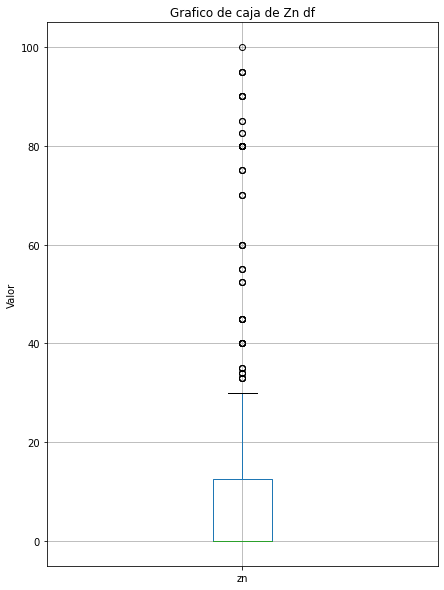

In [53]:
df.boxplot(column=["zn"],figsize=(7,10))
plt.ylabel('Valor')
plt.title("Grafico de caja de Zn df")
plt.show()

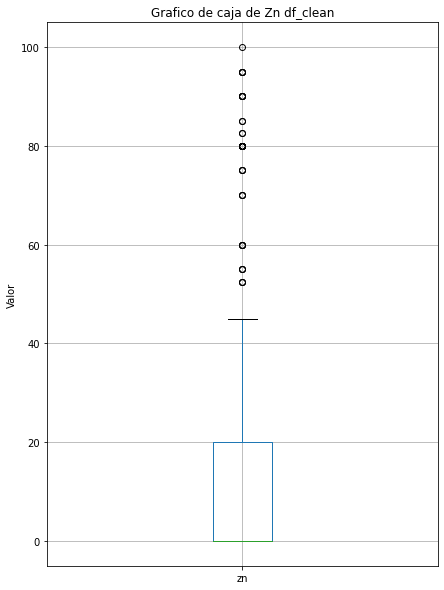

In [54]:
df_clean.boxplot(column=["zn"],figsize=(7,10))
plt.ylabel('Valor')
plt.title("Grafico de caja de Zn df_clean")
plt.show()

In [55]:
# Exploratorio, usado para revisar el valor del multiplicador de IQR
df_aux, df_aux_p = clean_custom(df_clean, "zn", 2)
print("Proporción de datos considerados respecto al original: " , df_aux_p, "\n\n")

Proporción de datos considerados respecto al original:  0.9144736842105263 




Del filtrado anterior por **Zn**, el nuevo dataset contiene un 91.45% de las observaciones respecto al original.

In [56]:
df_clean, df_clean_p = clean_custom(df_clean, "zn", 2)

In [57]:
df_clean.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,1.637091,6.258993,11.110624,0.081535,0.554332,6.305213,69.425180,3.699326,8.414868,387.028777,18.421583,365.805180,12.078561,23.032614
std,2.703963,12.696109,6.646314,0.273983,0.111145,0.654218,26.527994,1.793685,7.851266,156.962863,2.118443,76.032695,6.170127,8.564371
min,0.006320,0.000000,1.250000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,188.000000,13.000000,0.320000,1.730000,6.300000
25%,0.091640,0.000000,5.860000,0.000000,0.464000,5.914000,49.100000,2.261600,4.000000,277.000000,17.400000,377.170000,7.260000,17.800000
50%,0.241030,0.000000,8.560000,0.000000,0.532000,6.193000,77.000000,3.279700,5.000000,307.000000,18.700000,391.700000,11.100000,21.500000
75%,1.612820,0.000000,18.100000,0.000000,0.609000,6.567000,92.900000,4.721100,8.000000,432.000000,20.200000,396.140000,16.140000,25.000000
max,10.834200,55.000000,27.740000,1.000000,0.871000,8.780000,100.000000,9.222900,24.000000,711.000000,21.200000,396.900000,34.410000,50.000000


In [58]:
df_clean

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


#### Indus

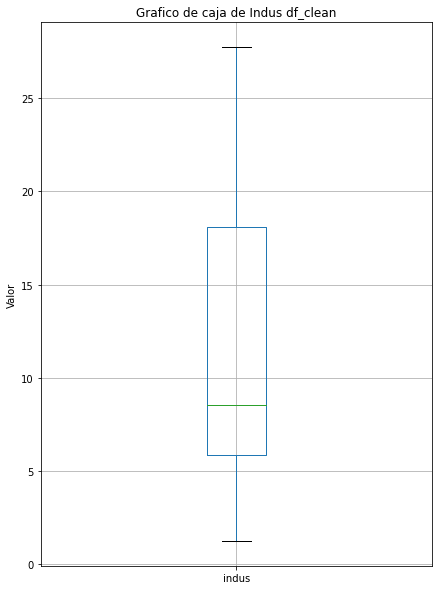

In [59]:
df_clean.boxplot(column=["indus"],figsize=(7,10))
plt.ylabel('Valor')
plt.title("Grafico de caja de Indus df_clean")
plt.show()

In [60]:
# Exploratorio, usado para revisar el valor del multiplicador de IQR
df_aux, df_aux_p = clean_custom(df_clean, "indus", 1.5)
print("Proporción de datos considerados respecto al original: " , df_aux_p, "\n\n")

Proporción de datos considerados respecto al original:  1.0 




In [61]:
df_clean, df_clean_p = clean_custom(df_clean, "indus", 1.5)

In [62]:
df_clean.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,1.637091,6.258993,11.110624,0.081535,0.554332,6.305213,69.425180,3.699326,8.414868,387.028777,18.421583,365.805180,12.078561,23.032614
std,2.703963,12.696109,6.646314,0.273983,0.111145,0.654218,26.527994,1.793685,7.851266,156.962863,2.118443,76.032695,6.170127,8.564371
min,0.006320,0.000000,1.250000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,188.000000,13.000000,0.320000,1.730000,6.300000
25%,0.091640,0.000000,5.860000,0.000000,0.464000,5.914000,49.100000,2.261600,4.000000,277.000000,17.400000,377.170000,7.260000,17.800000
50%,0.241030,0.000000,8.560000,0.000000,0.532000,6.193000,77.000000,3.279700,5.000000,307.000000,18.700000,391.700000,11.100000,21.500000
75%,1.612820,0.000000,18.100000,0.000000,0.609000,6.567000,92.900000,4.721100,8.000000,432.000000,20.200000,396.140000,16.140000,25.000000
max,10.834200,55.000000,27.740000,1.000000,0.871000,8.780000,100.000000,9.222900,24.000000,711.000000,21.200000,396.900000,34.410000,50.000000


In [63]:
df_clean

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


#### Chas

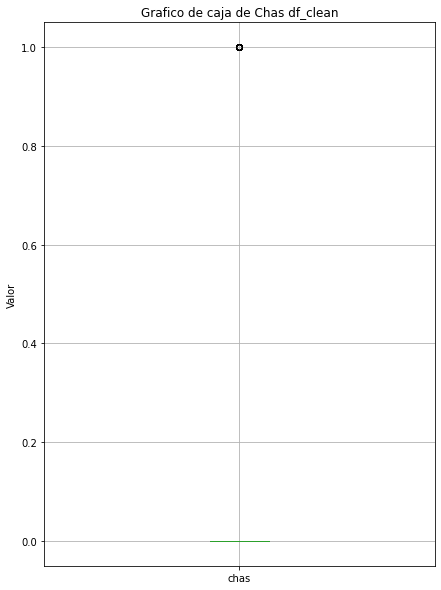

In [64]:
df_clean.boxplot(column=["chas"],figsize=(7,10))
plt.ylabel('Valor')
plt.title("Grafico de caja de Chas df_clean")
plt.show()

Dado que es una variable categórica, no tiene sentido separarla. Se toman todos los datos.

#### Nox

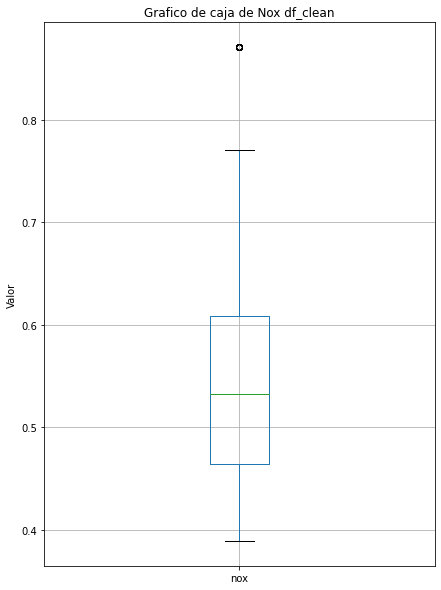

In [65]:
df_clean.boxplot(column=["nox"],figsize=(7,10))
plt.ylabel('Valor')
plt.title("Grafico de caja de Nox df_clean")
plt.show()

In [66]:
# Exploratorio, usado para revisar el valor del multiplicador de IQR
df_aux, df_aux_p = clean_custom(df_clean, "nox", 1.5)
print("Proporción de datos considerados respecto al original: " , df_aux_p, "\n\n")

Proporción de datos considerados respecto al original:  0.9616306954436451 




In [67]:
df_clean, df_clean_p = clean_custom(df_clean, "nox", 1.5)

In [68]:
df_clean.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000
mean,1.609106,6.508728,10.772693,0.074813,0.541697,6.333474,68.358354,3.784658,8.551122,386.391521,18.570075,368.393342,11.774364,23.296259
std,2.749139,12.884460,6.554139,0.263418,0.093145,0.644329,26.481057,1.776223,7.976403,160.038195,2.022672,73.392550,5.933186,8.607579
min,0.006320,0.000000,1.250000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,188.000000,13.000000,0.320000,1.730000,6.300000
25%,0.088730,0.000000,5.640000,0.000000,0.460000,5.935000,48.000000,2.353400,4.000000,277.000000,17.400000,378.250000,7.180000,18.400000
50%,0.221880,0.000000,8.560000,0.000000,0.524000,6.216000,74.900000,3.375100,5.000000,307.000000,19.000000,391.990000,10.580000,21.700000
75%,1.232470,0.000000,18.100000,0.000000,0.605000,6.606000,91.800000,4.812200,8.000000,437.000000,20.200000,396.210000,15.710000,25.000000
max,10.834200,55.000000,27.740000,1.000000,0.770000,8.780000,100.000000,9.222900,24.000000,711.000000,21.200000,396.900000,34.410000,50.000000


In [69]:
df_clean

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


#### Rm

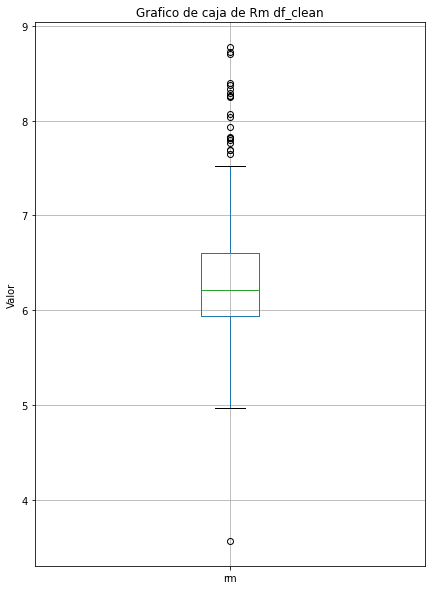

In [70]:
df_clean.boxplot(column=["rm"],figsize=(7,10))
plt.ylabel('Valor')
plt.title("Grafico de caja de Rm df_clean")
plt.show()

In [71]:
# Exploratorio, usado para revisar el valor del multiplicador de IQR
df_aux, df_aux_p = clean_custom(df_clean, "rm", 1.5)
print("Proporción de datos considerados respecto al original: " , df_aux_p, "\n\n")

Proporción de datos considerados respecto al original:  0.9451371571072319 




In [72]:
df_clean, df_clean_p = clean_custom(df_clean, "rm", 1.5)

In [73]:
df_clean.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,1.653579,6.511873,10.938311,0.065963,0.542015,6.241889,68.270449,3.813694,8.635884,390.092348,18.679683,367.494855,12.197309,22.118206
std,2.807910,13.056268,6.537639,0.248546,0.093471,0.476262,26.610714,1.784378,8.081227,161.119067,1.959466,75.350182,5.817559,7.054903
min,0.006320,0.000000,1.250000,0.000000,0.389000,4.963000,2.900000,1.129600,1.000000,188.000000,13.000000,0.320000,1.730000,6.300000
25%,0.088510,0.000000,5.860000,0.000000,0.460000,5.925000,46.950000,2.361700,4.000000,277.000000,17.700000,378.170000,7.685000,18.150000
50%,0.211240,0.000000,8.560000,0.000000,0.524000,6.185000,74.800000,3.414500,5.000000,307.000000,19.100000,392.300000,11.280000,21.400000
75%,1.242130,0.000000,18.100000,0.000000,0.605000,6.503000,92.000000,4.967100,8.000000,437.000000,20.200000,396.260000,16.205000,24.450000
max,10.834200,55.000000,27.740000,1.000000,0.770000,7.520000,100.000000,9.222900,24.000000,711.000000,21.200000,396.900000,34.410000,50.000000


In [74]:
df_clean

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


#### Age

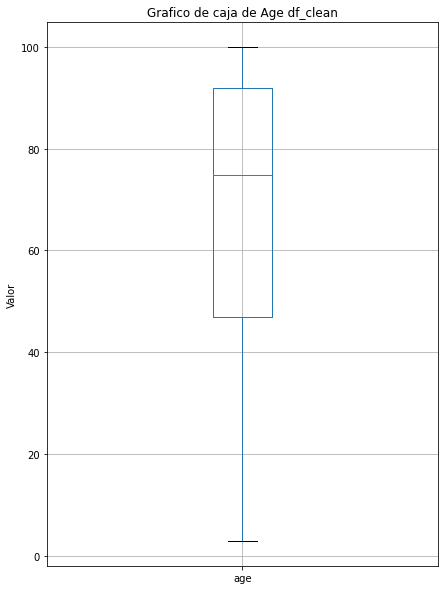

In [75]:
df_clean.boxplot(column=["age"],figsize=(7,10))
plt.ylabel('Valor')
plt.title("Grafico de caja de Age df_clean")
plt.show()

In [76]:
# Exploratorio, usado para revisar el valor del multiplicador de IQR
df_aux, df_aux_p = clean_custom(df_clean, "age", 1.5)
print("Proporción de datos considerados respecto al original: " , df_aux_p, "\n\n")

Proporción de datos considerados respecto al original:  1.0 




In [77]:
df_clean, df_clean_p = clean_custom(df_clean, "age", 1.5)

In [78]:
df_clean.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,1.653579,6.511873,10.938311,0.065963,0.542015,6.241889,68.270449,3.813694,8.635884,390.092348,18.679683,367.494855,12.197309,22.118206
std,2.807910,13.056268,6.537639,0.248546,0.093471,0.476262,26.610714,1.784378,8.081227,161.119067,1.959466,75.350182,5.817559,7.054903
min,0.006320,0.000000,1.250000,0.000000,0.389000,4.963000,2.900000,1.129600,1.000000,188.000000,13.000000,0.320000,1.730000,6.300000
25%,0.088510,0.000000,5.860000,0.000000,0.460000,5.925000,46.950000,2.361700,4.000000,277.000000,17.700000,378.170000,7.685000,18.150000
50%,0.211240,0.000000,8.560000,0.000000,0.524000,6.185000,74.800000,3.414500,5.000000,307.000000,19.100000,392.300000,11.280000,21.400000
75%,1.242130,0.000000,18.100000,0.000000,0.605000,6.503000,92.000000,4.967100,8.000000,437.000000,20.200000,396.260000,16.205000,24.450000
max,10.834200,55.000000,27.740000,1.000000,0.770000,7.520000,100.000000,9.222900,24.000000,711.000000,21.200000,396.900000,34.410000,50.000000


In [79]:
df_clean

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


#### Dis

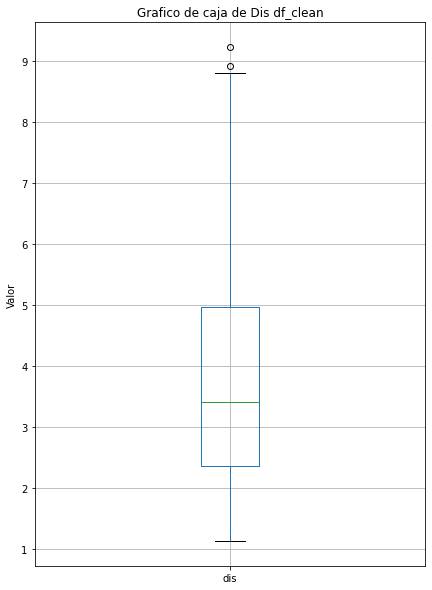

In [80]:
df_clean.boxplot(column=["dis"],figsize=(7,10))
plt.ylabel('Valor')
plt.title("Grafico de caja de Dis df_clean")
plt.show()

In [81]:
# Exploratorio, usado para revisar el valor del multiplicador de IQR
df_aux, df_aux_p = clean_custom(df_clean, "dis", 1.5)
print("Proporción de datos considerados respecto al original: " , df_aux_p, "\n\n")

Proporción de datos considerados respecto al original:  0.9947229551451188 




In [82]:
df_clean, df_clean_p = clean_custom(df_clean, "dis", 1.5)

In [83]:
df_clean.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000
mean,1.662082,6.441645,10.977135,0.066313,0.542644,6.237706,68.456764,3.785836,8.655172,390.713528,18.678780,367.377241,12.231300,22.069496
std,2.812927,13.054073,6.531078,0.249159,0.093317,0.474002,26.487881,1.747386,8.097014,161.266357,1.964546,75.532469,5.811826,7.040612
min,0.006320,0.000000,1.250000,0.000000,0.389000,4.963000,2.900000,1.129600,1.000000,188.000000,13.000000,0.320000,1.730000,6.300000
25%,0.090650,0.000000,5.860000,0.000000,0.460000,5.924000,47.200000,2.355200,4.000000,277.000000,17.600000,378.090000,7.700000,18.100000
50%,0.211610,0.000000,8.560000,0.000000,0.524000,6.182000,74.900000,3.410600,5.000000,307.000000,19.100000,392.300000,11.320000,21.200000
75%,1.251790,0.000000,18.100000,0.000000,0.605000,6.495000,92.100000,4.862800,8.000000,437.000000,20.200000,396.280000,16.210000,24.400000
max,10.834200,55.000000,27.740000,1.000000,0.770000,7.520000,100.000000,8.792100,24.000000,711.000000,21.200000,396.900000,34.410000,50.000000


In [84]:
df_clean

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


#### Rad

In [85]:
df_clean.groupby("rad").size()

rad
1     13
2     16
3     28
4     96
5     85
6     26
7     15
8     18
24    80
dtype: int64

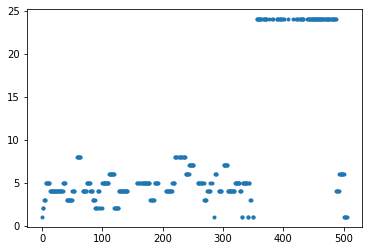

In [86]:
df_clean["rad"].plot(ls="",marker=".")

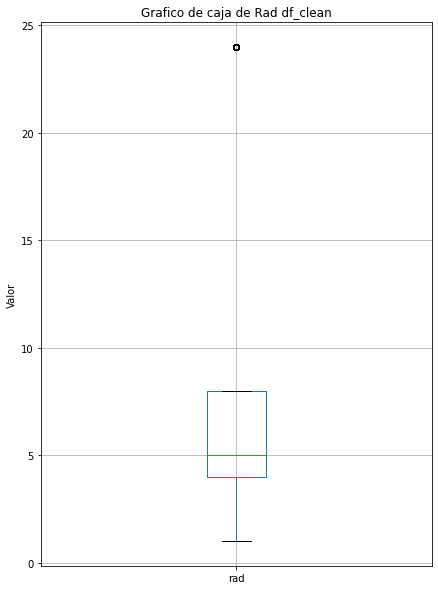

In [87]:
df_clean.boxplot(column=["rad"],figsize=(7,10))
plt.ylabel('Valor')
plt.title("Grafico de caja de Rad df_clean")
plt.show()

In [88]:
# Exploratorio, usado para revisar el valor del multiplicador de IQR
df_aux, df_aux_p = clean_custom(df_clean, "rad", 5)
print("Proporción de datos considerados respecto al original: " , df_aux_p, "\n\n")

Proporción de datos considerados respecto al original:  1.0 




In [89]:
df_clean, df_clean_p = clean_custom(df_clean, "rad", 5)

In [90]:
df_clean.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000
mean,1.662082,6.441645,10.977135,0.066313,0.542644,6.237706,68.456764,3.785836,8.655172,390.713528,18.678780,367.377241,12.231300,22.069496
std,2.812927,13.054073,6.531078,0.249159,0.093317,0.474002,26.487881,1.747386,8.097014,161.266357,1.964546,75.532469,5.811826,7.040612
min,0.006320,0.000000,1.250000,0.000000,0.389000,4.963000,2.900000,1.129600,1.000000,188.000000,13.000000,0.320000,1.730000,6.300000
25%,0.090650,0.000000,5.860000,0.000000,0.460000,5.924000,47.200000,2.355200,4.000000,277.000000,17.600000,378.090000,7.700000,18.100000
50%,0.211610,0.000000,8.560000,0.000000,0.524000,6.182000,74.900000,3.410600,5.000000,307.000000,19.100000,392.300000,11.320000,21.200000
75%,1.251790,0.000000,18.100000,0.000000,0.605000,6.495000,92.100000,4.862800,8.000000,437.000000,20.200000,396.280000,16.210000,24.400000
max,10.834200,55.000000,27.740000,1.000000,0.770000,7.520000,100.000000,8.792100,24.000000,711.000000,21.200000,396.900000,34.410000,50.000000


In [91]:
df_clean

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


#### Tax

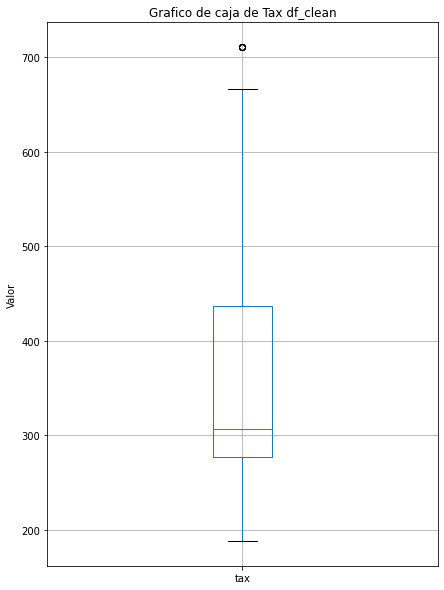

In [92]:
df_clean.boxplot(column=["tax"],figsize=(7,10))
plt.ylabel('Valor')
plt.title("Grafico de caja de Tax df_clean")
plt.show()

In [93]:
# Exploratorio, usado para revisar el valor del multiplicador de IQR
df_aux, df_aux_p = clean_custom(df_clean, "tax", 1.5)
print("Proporción de datos considerados respecto al original: " , df_aux_p, "\n\n")

Proporción de datos considerados respecto al original:  0.986737400530504 




In [94]:
df_clean, df_clean_p = clean_custom(df_clean, "tax", 1.5)

In [95]:
df_clean.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000
mean,1.682382,6.528226,10.751828,0.067204,0.541752,6.246473,68.109946,3.811515,8.717742,386.408602,18.659677,367.356559,12.118468,22.194086
std,2.826308,13.120163,6.276302,0.250713,0.093623,0.469322,26.486106,1.744837,8.133217,157.975397,1.970753,75.949361,5.730697,6.982378
min,0.006320,0.000000,1.250000,0.000000,0.389000,4.963000,2.900000,1.129600,1.000000,188.000000,13.000000,0.320000,1.730000,6.300000
25%,0.088620,0.000000,5.860000,0.000000,0.460000,5.926750,46.600000,2.386950,4.000000,277.000000,17.600000,378.210000,7.652500,18.275000
50%,0.218480,0.000000,8.560000,0.000000,0.524000,6.189000,74.450000,3.421400,5.000000,307.000000,19.100000,392.350000,11.235000,21.400000
75%,1.290805,0.000000,18.100000,0.000000,0.605000,6.499000,91.800000,4.967100,8.000000,437.000000,20.200000,396.285000,15.962500,24.425000
max,10.834200,55.000000,25.650000,1.000000,0.770000,7.520000,100.000000,8.792100,24.000000,666.000000,21.200000,396.900000,34.410000,50.000000


In [96]:
df_clean

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


#### Ptratio

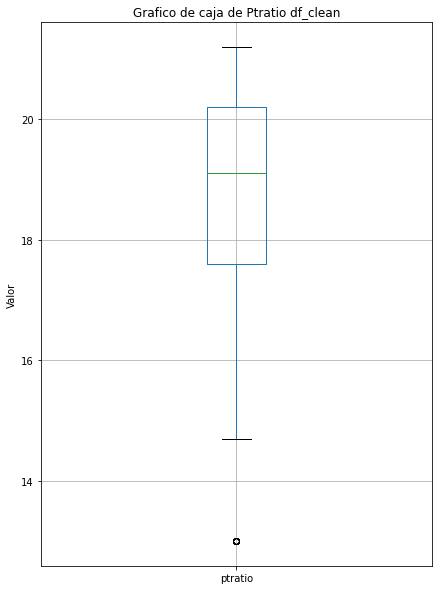

In [97]:
df_clean.boxplot(column=["ptratio"],figsize=(7,10))
plt.ylabel('Valor')
plt.title("Grafico de caja de Ptratio df_clean")
plt.show()

In [98]:
# Exploratorio, usado para revisar el valor del multiplicador de IQR
df_aux, df_aux_p = clean_custom(df_clean, "ptratio", 1.5)
print("Proporción de datos considerados respecto al original: " , df_aux_p, "\n\n")

Proporción de datos considerados respecto al original:  0.9758064516129032 




In [99]:
df_clean, df_clean_p = clean_custom(df_clean, "ptratio", 1.5)

In [100]:
df_clean.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000
mean,1.707958,6.194215,10.919972,0.068871,0.539340,6.226482,67.712397,3.853239,8.809917,389.443526,18.800000,366.810386,12.200496,21.897245
std,2.856432,13.107035,6.260951,0.253583,0.093432,0.448616,26.579430,1.745308,8.212288,158.729082,1.778851,76.805209,5.757167,6.735303
min,0.006320,0.000000,1.250000,0.000000,0.389000,4.963000,2.900000,1.129600,1.000000,188.000000,14.700000,0.320000,1.730000,6.300000
25%,0.087665,0.000000,5.910000,0.000000,0.458000,5.925000,45.800000,2.423950,4.000000,279.000000,17.800000,377.905000,7.685000,18.150000
50%,0.210380,0.000000,8.560000,0.000000,0.520000,6.176000,73.900000,3.495200,5.000000,307.000000,19.100000,392.530000,11.340000,21.200000
75%,1.371355,0.000000,18.100000,0.000000,0.585000,6.483000,91.750000,5.057250,8.000000,437.000000,20.200000,396.375000,16.205000,24.300000
max,10.834200,55.000000,25.650000,1.000000,0.770000,7.489000,100.000000,8.792100,24.000000,666.000000,21.200000,396.900000,34.410000,50.000000


In [101]:
df_clean

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


#### Black

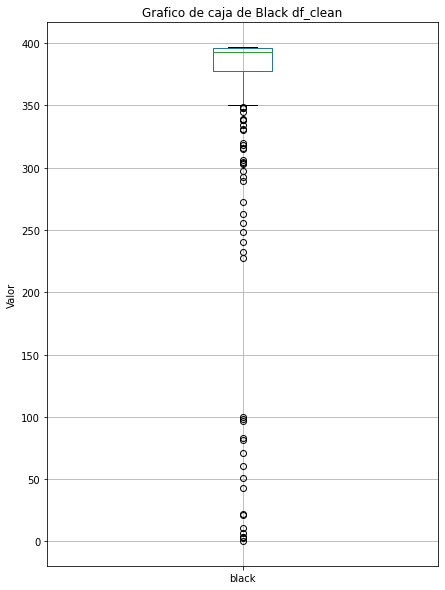

In [102]:
df_clean.boxplot(column=["black"],figsize=(7,10))
plt.ylabel('Valor')
plt.title("Grafico de caja de Black df_clean")
plt.show()

In [103]:
# Exploratorio, usado para revisar el valor del multiplicador de IQR
df_aux, df_aux_p = clean_custom(df_clean, "black", 1.5)
print("Proporción de datos considerados respecto al original: " , df_aux_p, "\n\n")

Proporción de datos considerados respecto al original:  0.8760330578512396 




In [104]:
df_clean, df_clean_p = clean_custom(df_clean, "black", 1.5)

In [105]:
df_clean.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,1.255964,7.070755,10.120535,0.072327,0.526329,6.244025,65.226415,4.049986,7.691824,366.044025,18.725157,389.598491,11.437956,22.595912
std,2.467319,13.782751,6.114630,0.259437,0.088872,0.453228,26.794075,1.758348,7.379270,145.934165,1.717179,9.944534,5.376922,6.439641
min,0.006320,0.000000,1.250000,0.000000,0.389000,4.970000,2.900000,1.169100,1.000000,188.000000,14.700000,350.450000,1.730000,8.500000
25%,0.079165,0.000000,5.640000,0.000000,0.449000,5.933500,42.950000,2.552775,4.000000,277.000000,17.800000,386.997500,7.250000,18.925000
50%,0.165995,0.000000,8.140000,0.000000,0.510000,6.189000,68.950000,3.787900,5.000000,307.000000,18.900000,393.520000,10.330000,21.700000
75%,0.608537,0.000000,14.760000,0.000000,0.578250,6.495000,90.625000,5.400700,7.000000,403.000000,20.200000,396.900000,14.647500,24.575000
max,10.233000,55.000000,25.650000,1.000000,0.770000,7.489000,100.000000,8.792100,24.000000,666.000000,21.200000,396.900000,34.410000,50.000000


In [106]:
df_clean

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


#### Lstat

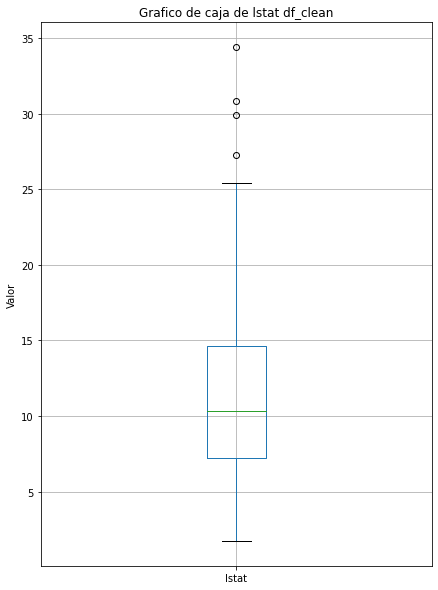

In [107]:
df_clean.boxplot(column=["lstat"],figsize=(7,10))
plt.ylabel('Valor')
plt.title("Grafico de caja de lstat df_clean")
plt.show()

In [108]:
# Exploratorio, usado para revisar el valor del multiplicador de IQR
df_aux, df_aux_p = clean_custom(df_clean, "lstat", 1.5)
print("Proporción de datos considerados respecto al original: " , df_aux_p, "\n\n")

Proporción de datos considerados respecto al original:  0.9874213836477987 




In [109]:
df_clean, df_clean_p = clean_custom(df_clean, "lstat", 1.5)

In [110]:
df_clean.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,1.264062,7.121019,10.050987,0.073248,0.526101,6.254580,64.812420,4.053334,7.745223,366.984076,18.729936,389.657962,11.193822,22.689490
std,2.481097,13.849765,6.049752,0.260960,0.089104,0.445399,26.708832,1.751840,7.409867,146.234274,1.710108,9.841259,4.944058,6.425751
min,0.006320,0.000000,1.250000,0.000000,0.389000,4.970000,2.900000,1.169100,1.000000,188.000000,14.700000,350.450000,1.730000,8.500000
25%,0.078802,0.000000,5.400000,0.000000,0.449000,5.949500,42.650000,2.574350,4.000000,277.000000,17.800000,387.255000,7.205000,19.200000
50%,0.160735,0.000000,8.140000,0.000000,0.510000,6.202000,68.450000,3.787900,5.000000,307.000000,18.900000,393.520000,10.280000,21.750000
75%,0.608537,0.000000,13.920000,0.000000,0.573000,6.507000,89.975000,5.372350,7.000000,403.000000,20.200000,396.900000,14.422500,24.600000
max,10.233000,55.000000,25.650000,1.000000,0.770000,7.489000,100.000000,8.792100,24.000000,666.000000,21.200000,396.900000,25.410000,50.000000


In [111]:
df_clean

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


# Entrega 16-06-2021



In [112]:
df_clean.head(30)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9
10,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45,15.0


In [113]:
#index = list(df_clean.index.values) #guarda indices como lista, se usara en .loc para comparar los mismos datos despues

In [114]:
#df_clean.loc[[33, 35]] #comprobacion de idea: obtener cierto row por index

In [115]:
#ind = np.arange(314)
#df_clean = df_clean.reset_index()

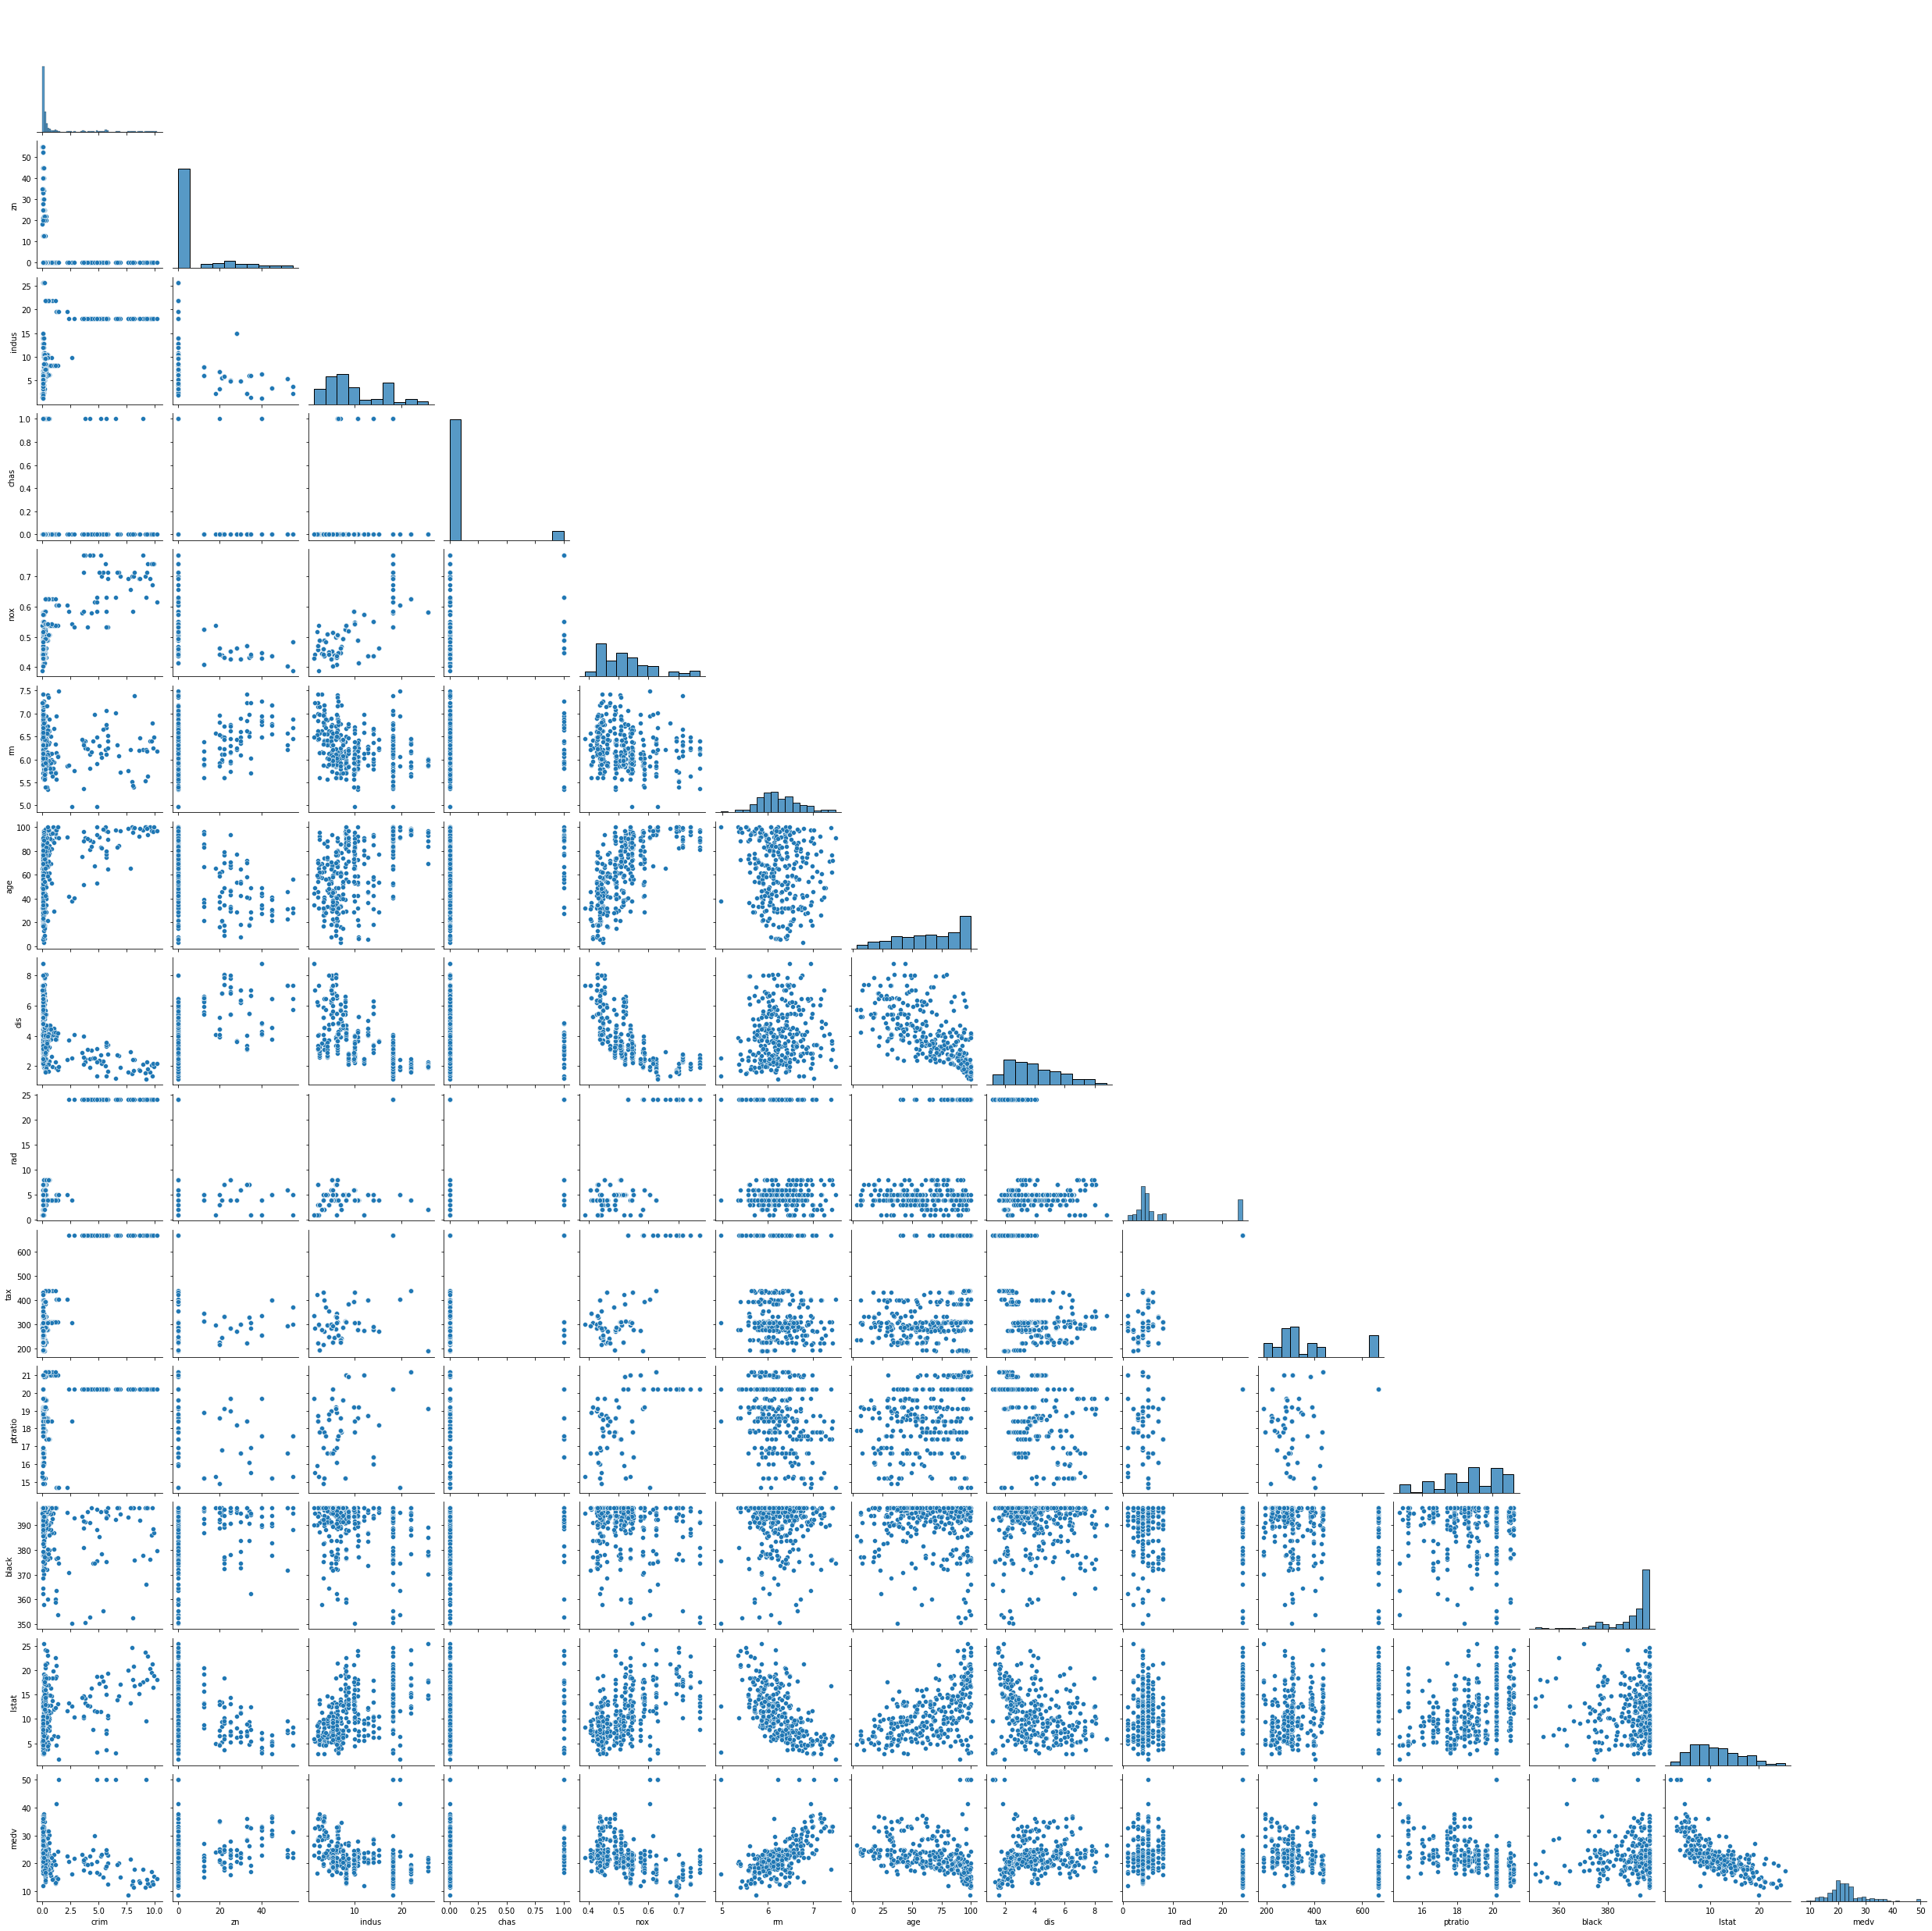

In [116]:
sns.pairplot(df_clean, corner=True)

In [117]:
corrdat = df_clean.corr()

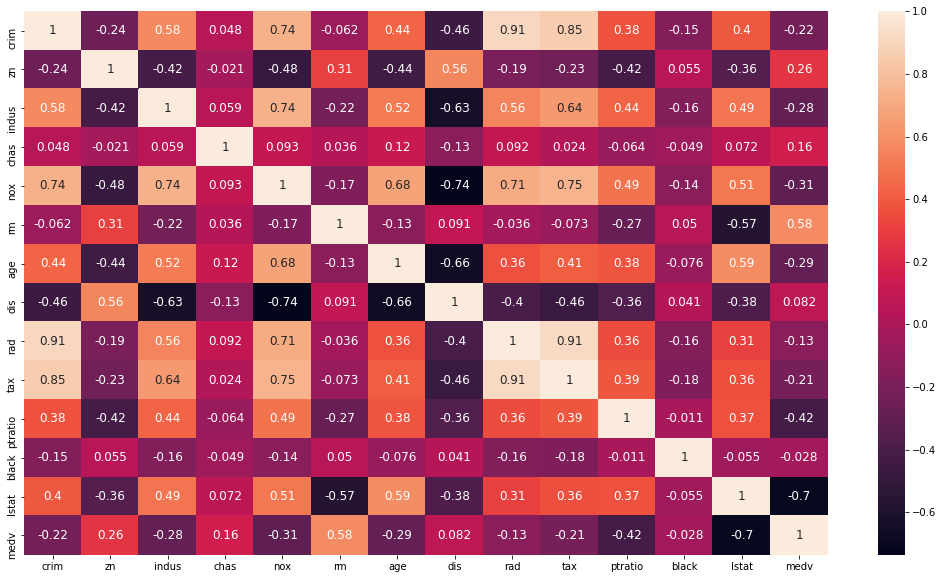

In [118]:
fig , ax = plt.subplots(figsize = (18,10))
sns.heatmap(corrdat , annot = True , annot_kws = {'size':12})

In [119]:
def getCorr(dat, lim): #obtiene los features con mayor impacto en el target
    feature = []
    valor = []
    
    for i , index in enumerate(dat.index): #bucle para todos los indices
        if abs(dat[index]) > lim:
            feature.append(index)
            print(index)
            valor.append(dat[index])

    df = pd.DataFrame(data = valor, index = feature, columns = ['corr value'])

    return df

In [120]:
lim = 0.4
corr_value = getCorr(corrdat["medv"], lim)

rm
ptratio
lstat
medv


In [121]:
corr_value

,corr value
rm,0.583915
ptratio,-0.420164
lstat,-0.696408
medv,1.000000


In [122]:
df_op = df_clean[corr_value.index]
df_op.head()

,rm,ptratio,lstat,medv
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


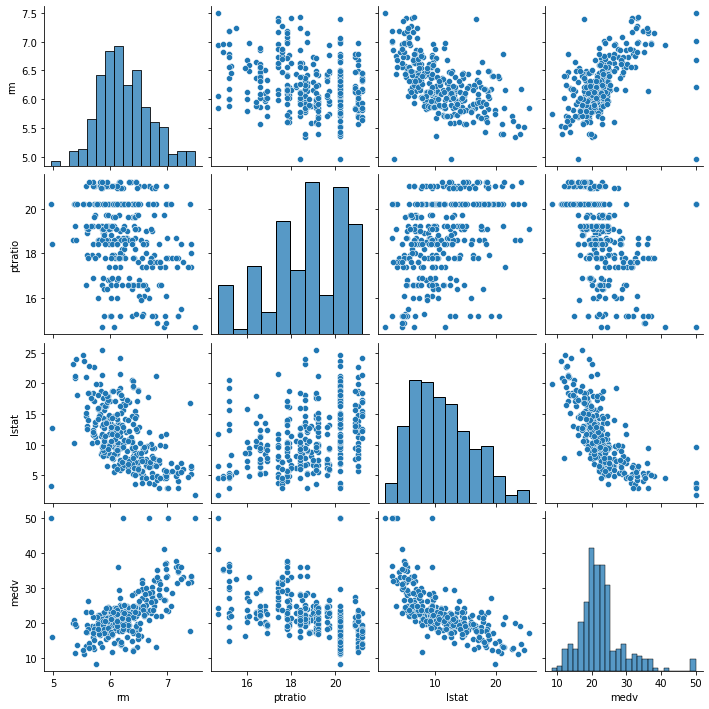

In [123]:
sns.pairplot(df_op)

In [124]:
X = df_op.drop(['medv'], axis=1)
Y = df_op.medv.copy()

In [125]:
X.head(10)

,rm,ptratio,lstat
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33
5,6.430,18.7,5.21
6,6.012,15.2,12.43
7,6.172,15.2,19.15
9,6.004,15.2,17.10
10,6.377,15.2,20.45


In [126]:
model_linreg = LinearRegression()

model_linreg.fit(X, Y)

Y_hat_1 = model_linreg.predict(X)

X["predicted"] = Y_hat_1

In [127]:
print("MSE:  ", mean_squared_error(Y, Y_hat_1))
print("RMSE: ", np.sqrt(mean_squared_error(Y, Y_hat_1)))
print("MAE:  ", mean_absolute_error(Y, Y_hat_1))
print("r2:   ", r2_score(Y, Y_hat_1))

MSE:   18.099681968714737
RMSE:  4.254372100406209
MAE:   2.7457844908605393
r2:    0.5602473102547344


In [128]:
Y_hat_1.shape

(314,)

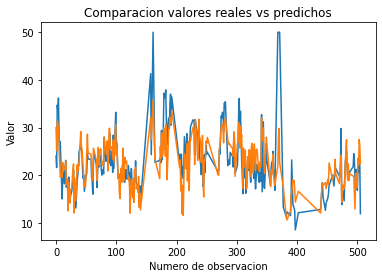

In [129]:
plt.plot(Y)
plt.plot(X["predicted"])
plt.xlabel("Numero de observacion")
plt.ylabel('Valor')
plt.title("Comparacion valores reales vs predichos")
plt.show()

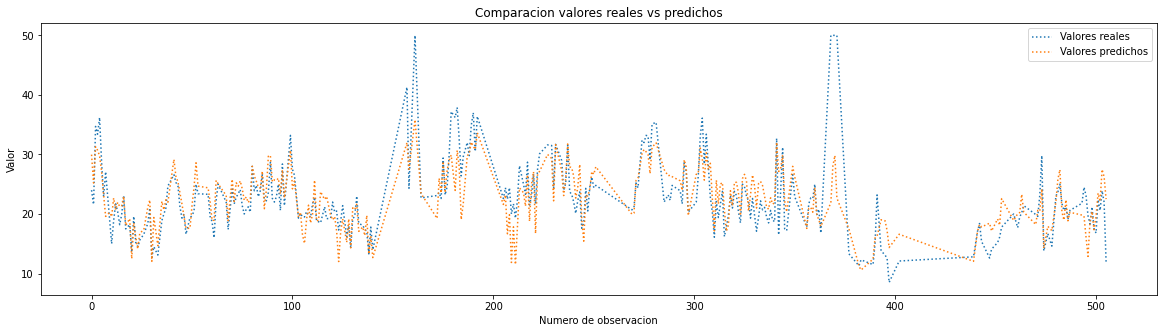

In [130]:
plt.subplots(figsize=(20,5))
plt.plot(Y, label="Valores reales", ls=":", marker="")
plt.plot(X["predicted"], label="Valores predichos", ls=":", marker="")
plt.xlabel("Numero de observacion")
plt.ylabel('Valor')
plt.title("Comparacion valores reales vs predichos")
plt.legend()
plt.show()

In [131]:
X = X.drop(['predicted'], 1)

In [132]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.33, random_state=16062021)

In [133]:
print(Xtrain.shape)
print(Xtest.shape)

(210, 3)
(104, 3)


In [134]:
model_split = LinearRegression()

model_split.fit(Xtrain, Ytrain)

predict = model_split.predict(Xtest)

print("MSE:  ", mean_squared_error(Ytest, predict))
print("RMSE: ", np.sqrt(mean_squared_error(Ytest, predict)))
print("MAE:  ", mean_absolute_error(Ytest, predict))
print("r2:   ", r2_score(Ytest, predict))

MSE:   15.580066291876003
RMSE:  3.9471592686229426
MAE:   2.981789204840839
r2:    0.5205959836536784


In [135]:
predict.shape

(104,)

In [136]:
Xtest["predict"] = predict

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [137]:
Xtest

,rm,ptratio,lstat,predict
241,6.095,16.6,12.40,22.464569
334,6.310,20.2,6.75,25.815906
100,6.727,20.9,9.42,24.338257
270,5.856,18.6,13.00,20.512063
312,6.023,18.4,11.72,22.012822
...,...,...,...,...
361,6.251,20.2,14.19,19.749606
6,6.012,15.2,12.43,22.889738
309,5.972,18.4,9.97,23.288598
322,6.041,19.6,7.70,24.707631


In [138]:
X_aux = Xtest.sort_index()
Y_aux = Ytest.sort_index()

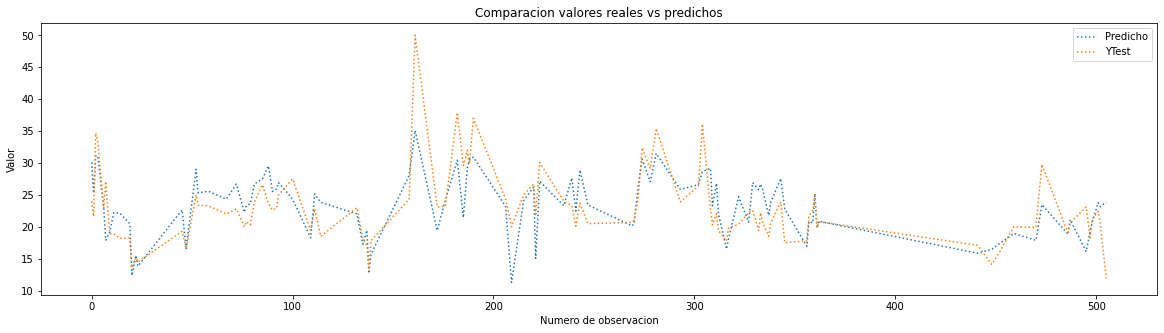

In [139]:
plt.subplots(figsize=(20,5))
plt.plot(X_aux["predict"], label="Predicho", ls=":", marker="")
plt.plot(Y_aux, label="YTest", ls=":", marker="")
plt.xlabel("Numero de observacion")
plt.ylabel('Valor')
plt.title("Comparacion valores reales vs predichos")
plt.legend()
plt.show()

In [140]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled_ss = scaler.transform(X)

In [141]:
model_linreg_scaled = LinearRegression()
model_linreg_scaled.fit(X_scaled_ss, Y)
Y_hat_ss = model_linreg_scaled.predict(X_scaled_ss)

In [142]:
Xs = X.copy()

for i in range(0, 314):
  Xs.iloc[i] = X_scaled_ss[i]

Xs

,rm,ptratio,lstat
0,0.720548,-2.008886,-1.258832
1,0.374239,-0.544656,-0.416075
2,2.092292,-0.544656,-1.451289
3,1.671774,-0.017533,-1.672107
4,2.006839,-0.017533,-1.187927
...,...,...,...
501,0.761026,1.329558,-0.308705
502,-0.302637,1.329558,-0.428230
503,1.622301,1.329558,-1.125126
504,1.213027,1.329558,-0.954953


In [143]:
Xs["predicted"] = Y_hat_ss

In [144]:
print("MSE:  ", mean_squared_error(Y_hat_ss, Y))
print("RMSE: ", np.sqrt(mean_squared_error(Y_hat_ss, Y)))
print("MAE:  ", mean_absolute_error(Y_hat_ss, Y))
print("r2:   ", r2_score(Y_hat_ss, Y))

MSE:   18.099681968714737
RMSE:  4.254372100406209
MAE:   2.74578449086054
r2:    0.2150739830498809


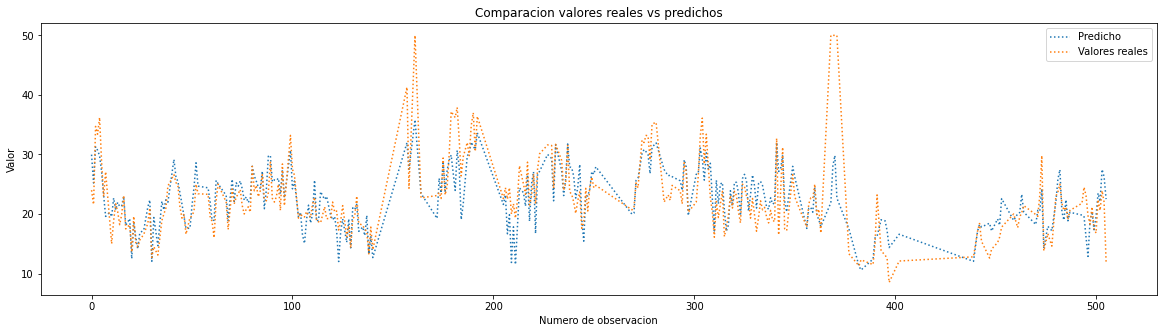

In [145]:
plt.subplots(figsize=(20,5))
plt.plot(Xs["predicted"], label="Predicho", ls=":", marker="")
plt.plot(Y, label="Valores reales", ls=":", marker="")
plt.xlabel("Numero de observacion")
plt.ylabel('Valor')
plt.title("Comparacion valores reales vs predichos")
plt.legend()
plt.show()

In [146]:
Xs = Xs.drop(['predicted'], 1)

In [147]:
scaler_mms = MinMaxScaler()
scaler_mms.fit(X)
X_scaled_mms = scaler_mms.transform(X)

In [148]:
model_linreg_mms = LinearRegression()
model_linreg_mms.fit(X_scaled_mms, Y)
Y_hat_mms = model_linreg_scaled.predict(X_scaled_mms)

In [149]:
Xmms = X.copy()

for i in range(0, 314):
  Xmms.iloc[i] = X_scaled_mms[i]

Xmms

,rm,ptratio,lstat
0,0.637158,0.092308,0.137247
1,0.576022,0.476923,0.312922
2,0.879317,0.476923,0.097128
3,0.805081,0.615385,0.051098
4,0.864232,0.615385,0.152027
...,...,...,...
501,0.644303,0.969231,0.335304
502,0.456530,0.969231,0.310389
503,0.796348,0.969231,0.165118
504,0.724097,0.969231,0.200591


In [150]:
Xmms["predicted"] = Y_hat_mms

In [151]:
print("MSE:  ", mean_squared_error(Y_hat_mms, Y))
print("RMSE: ", np.sqrt(mean_squared_error(Y_hat_mms, Y)))
print("MAE:  ", mean_absolute_error(Y_hat_mms, Y))
print("r2:   ", r2_score(Y_hat_mms, Y))

MSE:   33.72617364048392
RMSE:  5.8074240107369395
MAE:   3.767611779871285
r2:    -33.1231697341922


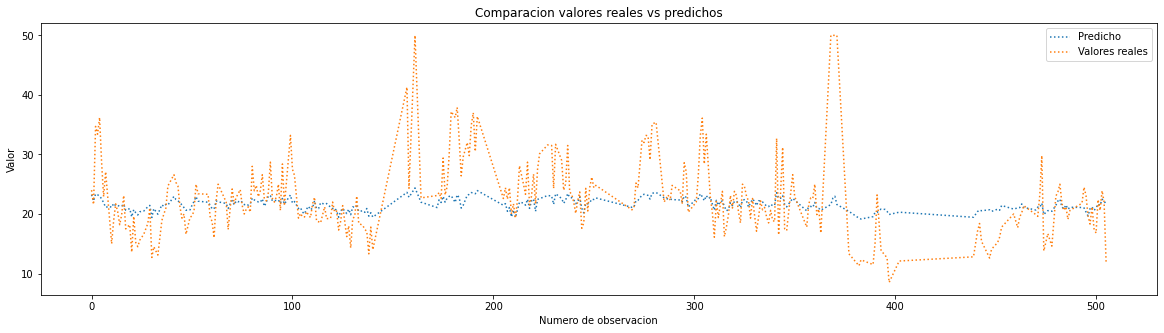

In [152]:
plt.subplots(figsize=(20,5))
plt.plot(Xmms["predicted"], label="Predicho", ls=":", marker="")
plt.plot(Y, label="Valores reales", ls=":", marker="")
plt.xlabel("Numero de observacion")
plt.ylabel('Valor')
plt.title("Comparacion valores reales vs predichos")
plt.legend()
plt.show()

In [153]:
model_tree = DecisionTreeRegressor()
model_tree.fit(X, Y)

Y_hat_tree = model_tree.predict(X)

In [154]:
Xtree = X.copy()

In [155]:
Xtree["predicted"] = Y_hat_tree

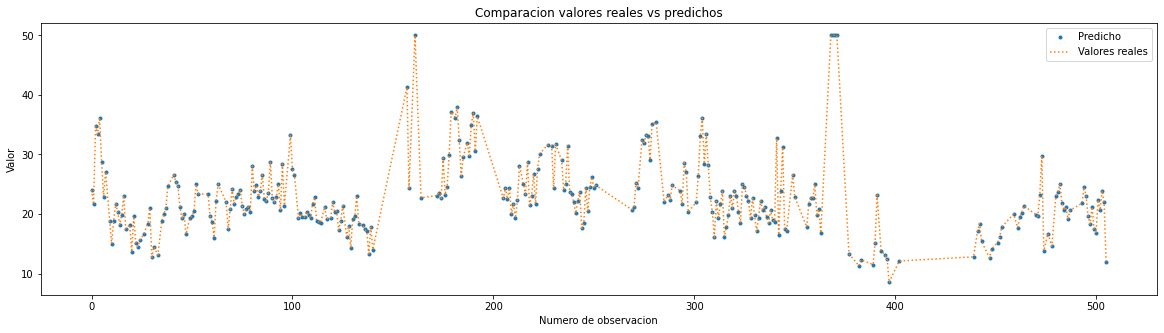

In [156]:
plt.subplots(figsize=(20,5))
plt.plot(Xtree["predicted"], label="Predicho", ls="", marker=".")
plt.plot(Y, label="Valores reales", ls=":", marker="")
plt.xlabel("Numero de observacion")
plt.ylabel('Valor')
plt.title("Comparacion valores reales vs predichos")
plt.legend()
plt.show()

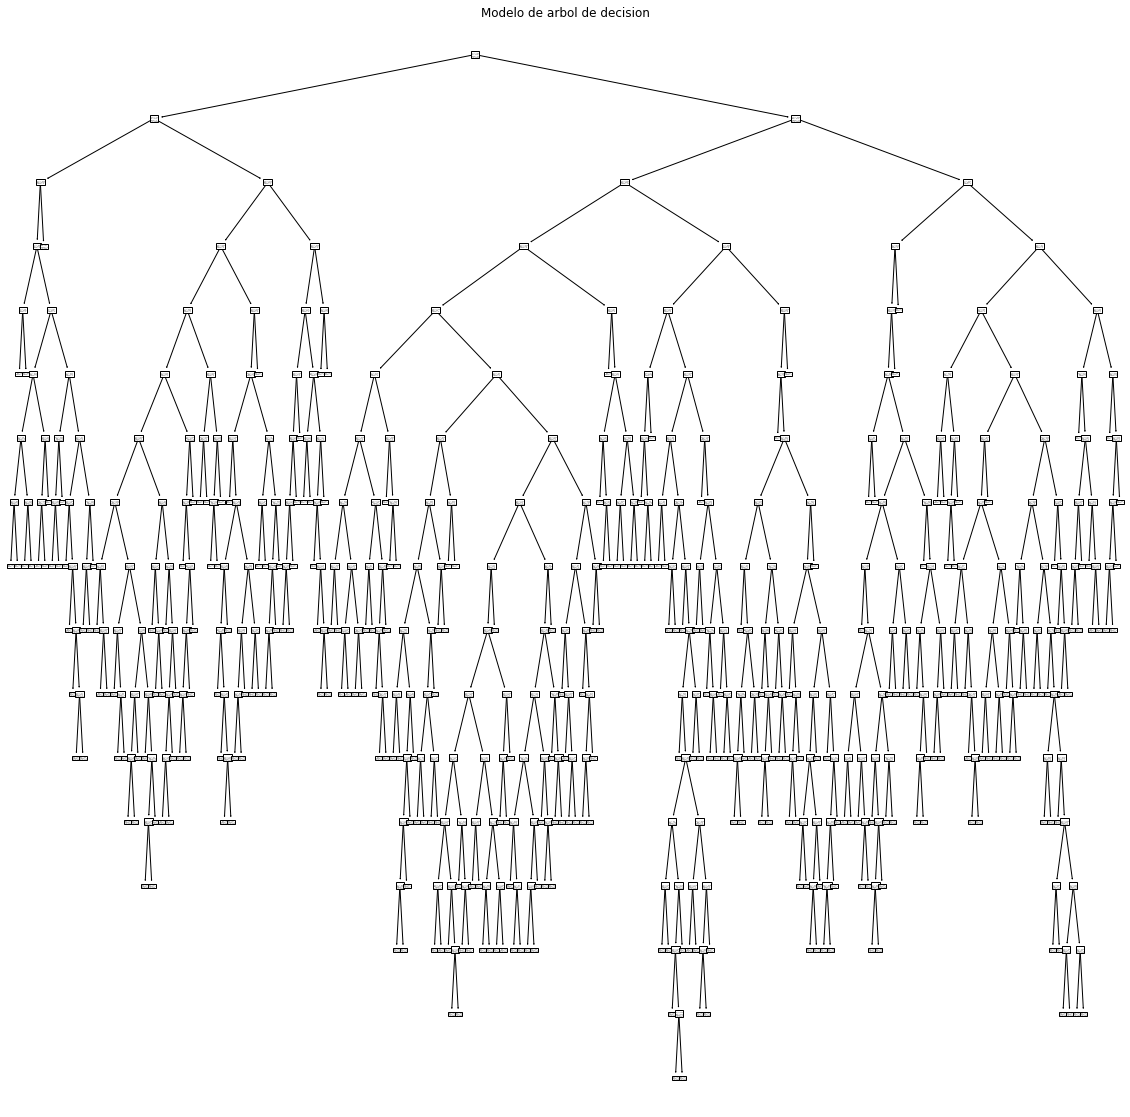

In [157]:
plt.subplots(1,1,figsize=(20,20))
tree.plot_tree(model_tree)
plt.title("Modelo de arbol de decision")
plt.show()

In [158]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2, random_state=16062021)

In [159]:
model_tree_grid = DecisionTreeRegressor()

params = {"max_depth": np.arange(3, 10),          # ej: [3,4,5]
          "min_samples_split": np.arange(2, 10),  # ej: [2,3,4]
          "random_state": np.array([16062021])
          }


In [160]:
grid = GridSearchCV(estimator=model_tree_grid, param_grid=params, cv=10, scoring='r2')
grid.fit(Xtrain, Ytrain)

Y_hat_forest = grid.predict(Xtest)

In [161]:
print(grid.best_score_)
print(grid.best_params_)

0.499132489766382
{'max_depth': 4, 'min_samples_split': 7, 'random_state': 16062021}


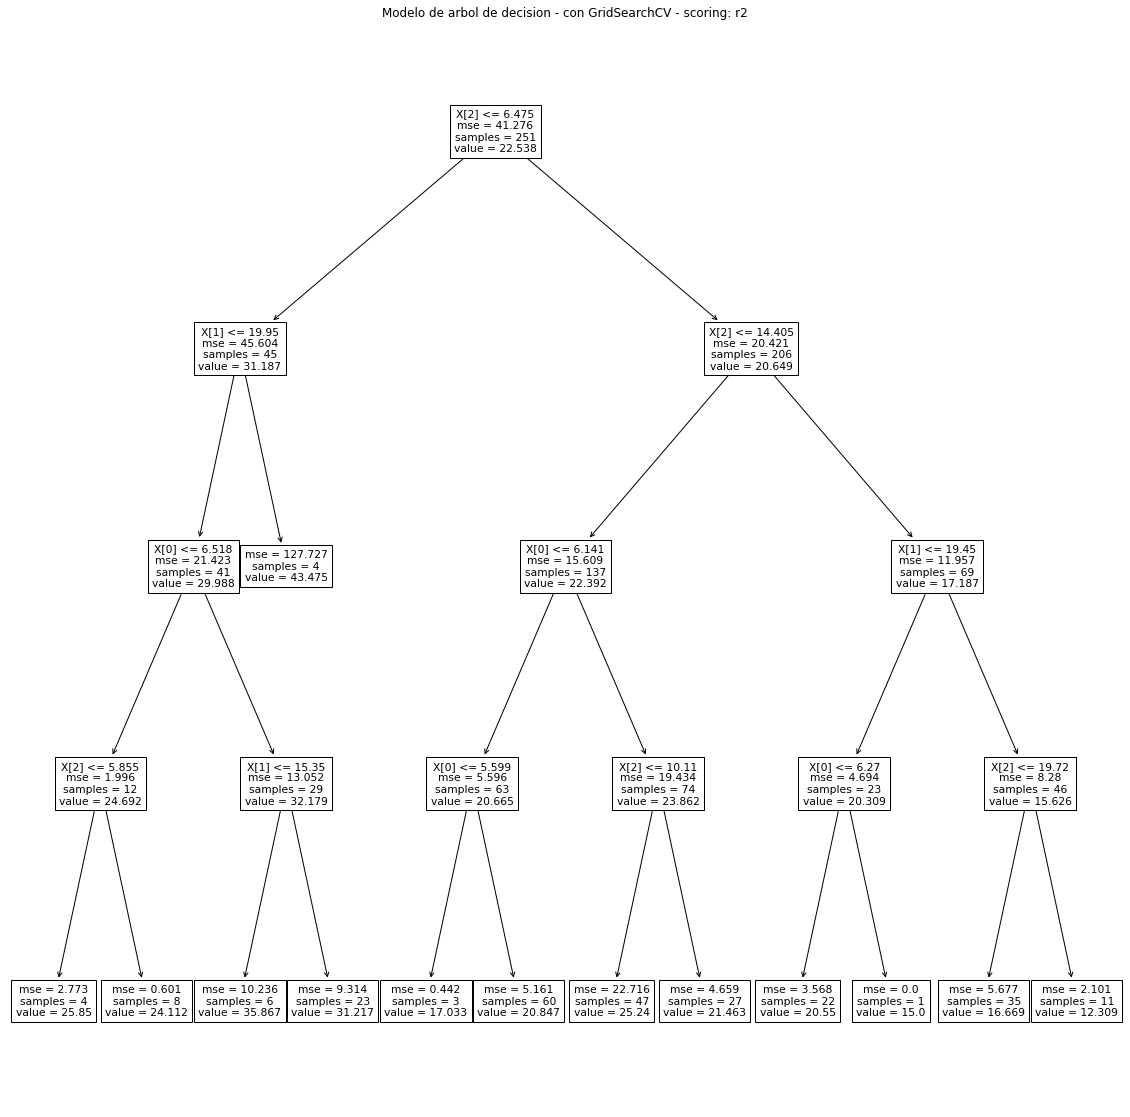

In [162]:
plt.subplots(1,1,figsize=(20,20))
tree.plot_tree(grid.best_estimator_)
plt.title("Modelo de arbol de decision - con GridSearchCV - scoring: r2")
plt.show()

In [163]:
model_forest = DecisionTreeRegressor(max_depth=4, min_samples_split=7, random_state=16062021)
model_forest.fit(X, Y)

Y_hat_forest = model_forest.predict(X)

In [164]:
Xforest = X.copy()

In [165]:
Xforest["predicted"] = Y_hat_forest

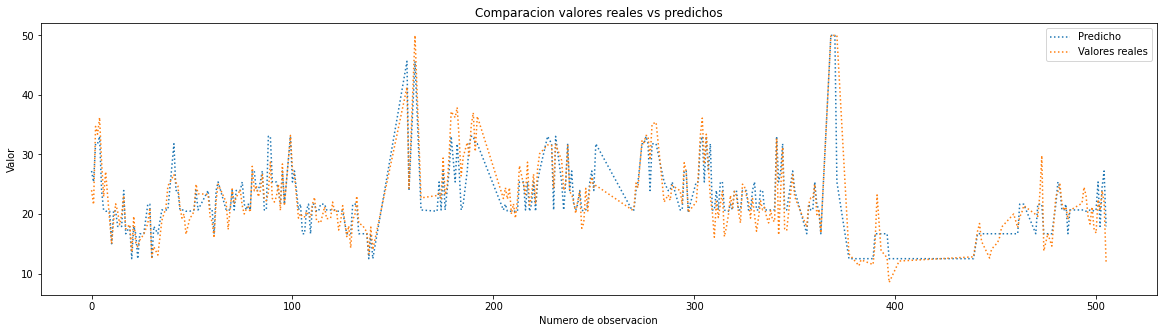

In [166]:
plt.subplots(figsize=(20,5))
plt.plot(Xforest["predicted"], label="Predicho", ls=":", marker="")
plt.plot(Y, label="Valores reales", ls=":", marker="")
plt.xlabel("Numero de observacion")
plt.ylabel('Valor')
plt.title("Comparacion valores reales vs predichos")
plt.legend()
plt.show()

In [167]:
grid = GridSearchCV(estimator=model_tree_grid, param_grid=params, cv=10, scoring='neg_root_mean_squared_error')
grid.fit(Xtrain, Ytrain)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
       

In [168]:
print(grid.best_score_)
print(grid.best_params_)

-4.107679582954297
{'max_depth': 4, 'min_samples_split': 7, 'random_state': 16062021}
